# sklearn 的数据集有好多个种

## 自带的小数据集（packaged dataset）：sklearn.datasets.load_<name>
## 可在线下载的数据集（Downloaded Dataset）：sklearn.datasets.fetch_<name>
## 计算机生成的数据集（Generated Dataset）：sklearn.datasets.make_<name>
## svmlight/libsvm格式的数据集:sklearn.datasets.load_svmlight_file(...)
## 从买了data.org在线下载获取的数据集:sklearn.datasets.fetch_mldata(...)

https://www.jianshu.com/p/498843a1df57

In [ ]:
from sklearn import datasets

In [34]:
datasets.get_data_home()

'/Users/mac/scikit_learn_data'

# 1 自带的经典小数据集

### 1.1 波士顿房价数据（适用于回归任务）

### 这个数据集包含了506处波士顿不同地理位置的房产的房价数据（因变量），和与之对应的包含房屋以及房屋周围的详细信息（自变量），其中包含城镇犯罪率、一氧化氮浓度、住宅平均房间数、到中心区域的加权距离以及自住房平均房价等13个维度的数据，因此，波士顿房价数据集能够应用到回归问题上，这里使用load_boston(return_X_y=False)方法来导出数据，其中参数return_X_y控制输出数据的结构，若选为True，则将因变量和自变量独立导出；

In [26]:
'''清空sklearn环境下所有数据'''
datasets.clear_data_home()

In [3]:
from sklearn import datasets

'''清空sklearn环境下所有数据'''
datasets.clear_data_home()

'''载入波士顿房价数据'''

X,y = datasets.load_boston(return_X_y=True)

'''获取自变量数据的形状'''

print(X.shape)

'''获取因变量数据的形状'''

print(y.shape)

(506, 13)
(506,)


### 1.2 威斯康辛州乳腺癌数据（适用于分类问题）

### 这个数据集包含了威斯康辛州记录的569个病人的乳腺癌恶性/良性（1/0）类别型数据（训练目标），以及与之对应的30个维度的生理指标数据；因此这是个非常标准的二类判别数据集，在这里使用load_breast_cancer(return_X_y)来导出数据：

In [9]:
from sklearn import datasets

'''载入威斯康辛州乳腺癌数据'''

X,y = datasets.load_breast_cancer(return_X_y=True)

'''获取自变量数据的形状'''

print(X.shape)

'''获取因变量数据的形状'''

print(y.shape)

print(set(y))

(569, 30)
(569,)
{0, 1}


### 1.3 糖尿病数据（适用于回归任务）

### 这是一个糖尿病的数据集，主要包括442行数据，10个属性值，分别是：Age(年龄)、性别(Sex)、Body mass index(体质指数)、Average Blood Pressure(平均血压)、S1~S6一年后疾病级数指标。Target为一年后患疾病的定量指标，因此适合与回归任务；这里使用load_diabetes(return_X_y)来导出数据：

In [1]:
from sklearn import datasets

'''载入糖尿病数据'''

X,y = datasets.load_diabetes(return_X_y=True)

'''获取自变量数据的形状'''

print(X.shape)

'''获取因变量数据的形状'''

print(y.shape)

(442, 10)
(442,)


### 1.4 手写数字数据集（适用于分类任务）

### 这个数据集是结构化数据的经典数据，共有1797个样本，每个样本有64的元素，对应到一个8x8像素点组成的矩阵，每一个值是其灰度值，我们都知道图片在计算机的底层实际是矩阵，每个位置对应一个像素点，有二值图，灰度图，1600万色图等类型，在这个样本中对应的是灰度图，控制每一个像素的黑白浓淡，所以每个样本还原到矩阵后代表一个手写体数字，这与我们之前接触的数据有很大区别；在这里我们使用load_digits(return_X_y)来导出数据：

In [5]:
from sklearn import datasets

'''载入手写数字数据'''

data,target = datasets.load_digits(return_X_y=True)

print(data.shape)

print(target.shape)

(1797, 64)
(1797,)


In [8]:
set(target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### 这里我们利用matshow()来绘制这种矩阵形式的数据示意图：



0
5
9


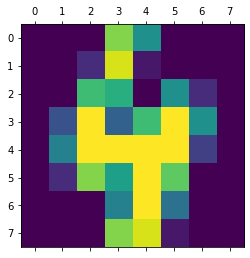

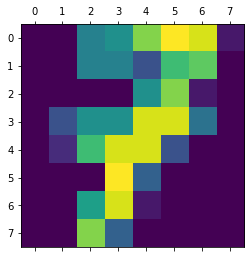

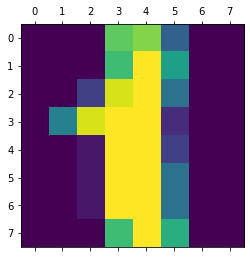

In [13]:
import matplotlib.pyplot as plt
import numpy as np

'''绘制数字0'''
num = np.array(data[1651]).reshape((8,8))
plt.matshow(num)
print(target[0])

'''绘制数字5'''
num = np.array(data[7]).reshape((8,8))
plt.matshow(num)
print(target[15])

'''绘制数字9'''
num = np.array(data[1]).reshape((8,8))
plt.matshow(num)
print(target[9])

### 1.6 红酒数据（适用于分类问题）

### 这是一个共178个样本，代表了红酒的三个档次（分别有59,71,48个样本），以及与之对应的13维的属性数据，非常适合用来练习各种分类算法；在这里我们使用load_wine(return_X_y)来导出数据：

In [14]:
from sklearn import datasets

'''载入wine数据'''

data,target = datasets.load_wine(return_X_y=True)

'''显示自变量的形状'''
print(data.shape)

'''显示训练目标的形状'''
print(target.shape)

(178, 13)
(178,)


# 2 自定义数据集

 ## 前面我们介绍了几种datasets自带的经典数据集，但有些时候我们需要自定义生成服从某些分布或者某些形状的数据集，而datasets中就提供了这样的一些方法：

### 2.1 产生服从正态分布的聚类用数据

### datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)，其中:

### n_samples：控制随机样本点的个数

### n_features：控制产生样本点的维度（对应n维正态分布）

### centers：控制产生的聚类簇的个数

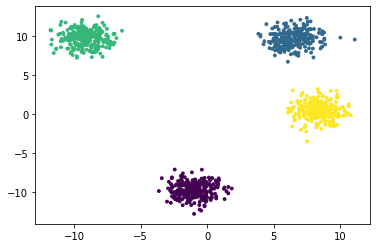

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

plt.scatter(X[:,0],X[:,1],c=y,s=8)
plt.show()

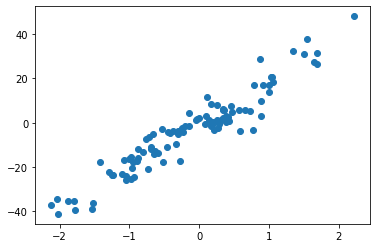

In [39]:
import matplotlib.pyplot as plt
from sklearn import datasets
# 创造一些线性回归的数据点
X, y = datasets.make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 5)
# 绘制创造的数据集的散点图
plt.scatter(X, y)
plt.show()

### 2.2 产生同心圆样本点

### datasets.make_circles(n_samples=100, shuffle=True, noise=0.04, random_state=None, factor=0.8)

### n_samples：控制样本点总数

### noise：控制属于同一个圈的样本点附加的漂移程度

### factor：控制内外圈的接近程度，越大越接近，上限为1

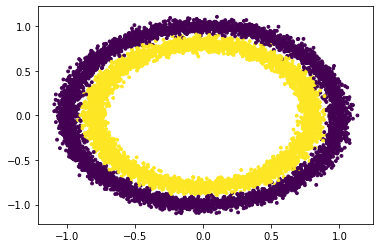

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_circles(n_samples=10000, shuffle=True, noise=0.04, random_state=None, factor=0.8)

plt.scatter(X[:,0],X[:,1],c=y,s=8)
plt.show()

### 2.3 生成模拟分类数据集

### datasets.make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

### n_samples：控制生成的样本点的个数

### n_features：控制与类别有关的自变量的维数

### n_classes：控制生成的分类数据类别的数量

In [24]:
from sklearn import datasets

X,y = datasets.make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

print(X.shape)
print(y.shape)
set(y)

(100, 20)
(100,)


{0, 1}

### 2.4 生成太极型非凸集样本点

### datasets.make_moons(n_samples,shuffle,noise,random_state)

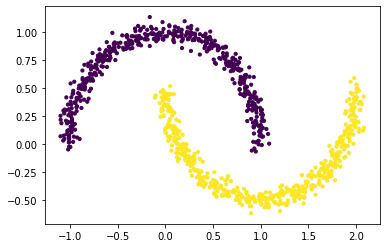

In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=None)

plt.scatter(X[:,0],X[:,1],c=y,s=10)